In [1]:
import pandas as pd
import anndata as ad
import scanpy as sc
import scvelo as scv

import numpy as np

import matplotlib.pyplot as plt


In [2]:
adata = sc.read_h5ad('data/test_classifier.h5ad')

In [45]:
# instead of calculating the max count for each allele every time, 
# we save the max count per gene per allele during preprocessing

spliced_data = adata.to_df(layer="spliced").transpose()
unspliced_data = adata.to_df(layer="unspliced").transpose()
max_count_allele_1 = []
max_count_allele_2 = []
for x in adata.var.index:
    max_count_allele_1.append(np.max(spliced_data.loc[x]))
    max_count_allele_2.append(np.max(unspliced_data.loc[x]))
    
adata.var['max_count_allele_1'] = max_count_allele_1
adata.var['max_count_allele_2'] = max_count_allele_2
adata.var

,gene_name,chromosome,autosomes,nuclear,Ribosomal_prot,sum_allele_1,sum_allele_2,ratio_allele_1,ratio_allele_2,ratio_sum_allele_1,ratio_sum_allele_2,ratio_mean_allele_1,ratio_mean_allele_2,ratio_std_allele_1,ratio_std_allele_2,p_value,max_count_allele_1,max_count_allele_2
ENSMUSG00000000001,Gnai3,3,autosome,nuclear,other protein,8956.0,10024.0,0.471865,0.528135,321.291178,360.708822,0.471101,0.528899,0.157535,0.157535,0.001223,43.0,46.0
ENSMUSG00000000049,Apoh,11,autosome,nuclear,other protein,46.0,48.0,0.489362,0.510638,29.500000,34.500000,0.460938,0.539062,0.498447,0.498447,1.000000,4.0,3.0
ENSMUSG00000000088,Cox5a,9,autosome,nuclear,other protein,7514.0,7028.0,0.516710,0.483290,350.605317,331.394683,0.514084,0.485916,0.151797,0.151797,0.089846,45.0,49.0
ENSMUSG00000000120,Ngfr,11,autosome,nuclear,other protein,0.0,4.0,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,2.0
ENSMUSG00000000184,Ccnd2,6,autosome,nuclear,other protein,36198.0,33010.0,0.523032,0.476968,357.947744,324.052256,0.524850,0.475150,0.144606,0.144606,0.020103,205.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100620,Gm28277,1,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0
ENSMUSG00000103811,Gm38004,9,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0
ENSMUSG00000112500,4933411E08Rik,10,autosome,nuclear,other protein,6.0,0.0,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.0,0.0
ENSMUSG00000114922,Ppifos,14,autosome,nuclear,other protein,2.0,0.0,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0


In [56]:
X = adata
x = "ENSMUSG00000000088"

color = None
# color = ['clusters']

x_label = "C57"
y_label = "CAST"

title = f"{gene_name} ({x}): UMI counts sum = {UMI_counts}"


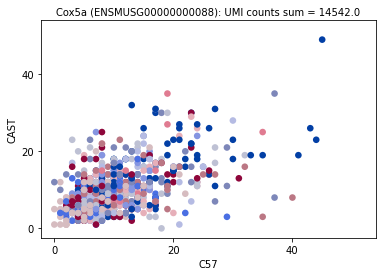

In [57]:
scv.pl.scatter(X, x,  xlabel=x_label, ylabel=y_label, title=title, xlim=xlim, ylim=ylim)

In [58]:
def scatter_plot(adata=None, x=None, xlabel=None, ylabel=None, gene_name=None, UMI_counts=None, title=None, color=None):
    if adata is None:
        print("Requires data field")
        return
    
    if x is None:
        print("Requires x field")
        return
    
    if gene_name is None:
        gene_name = adata.var.loc[x]['gene_name']
    
    if UMI_counts is None:
        UMI_counts = adata.var.loc[x]['sum_allele_1'] + adata.var.loc[x]['sum_allele_2']
    
    if title is None:
        title = f"{gene_name} ({x}): UMI counts sum = {UMI_counts}"
        
    # add some boolean for equal scale
    max = np.max([adata.var.loc[x]['max_count_allele_1'], adata.var.loc[x]['max_count_allele_2']])
    xlim = (None, max + 5) 
    ylim = (None, max + 5)
    
    scv.pl.scatter(adata, x, xlabel=x_label, ylabel=y_label, title=title, xlim=xlim, ylim=ylim)
        
        
    

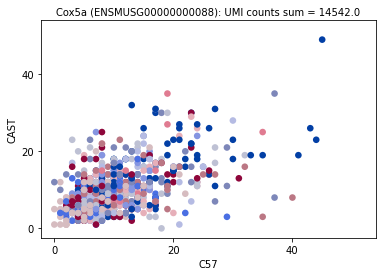

In [60]:
scatter_plot(X, x, xlabel=x_label, ylabel=y_label)